In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline



### Задание 1

In [339]:
df = pd.read_excel('PRBi.xlsx')

In [340]:
df.head()

,Nomer,Znachenie
0,1,12.19
1,2,29.79
2,3,9.09
3,4,10.51
4,5,-4.49


In [341]:
df.Znachenie.sum() / 1000
# Выборочное среднее
# В дальнейшем будем писать df.Znachenie.mean()

7.590100102044744

In [342]:
n = 1000
meanZn = df.Znachenie.mean()
df['diffBetweenMeanKv'] = (df['Znachenie'] - meanZn) ** 2

In [343]:
# Смещенная дисперсия
varSmeshRate2 = (df['diffBetweenMeanKv'].sum()) / n
varSmeshRate2

170.5586411818631

In [344]:
# Несмещенная дисперсия
varNeSmeshRate2 = (df['diffBetweenMeanKv'].sum()) / (n - 1)
varNeSmeshRate2

170.7293705524155

In [345]:
#min
df['Znachenie'].min()

-33.26398528367281

In [346]:
df['Znachenie'].max()

49.64002200216055

### Задание 2

Text(0.5, 1.0, 'Гистограмма распределения значений')

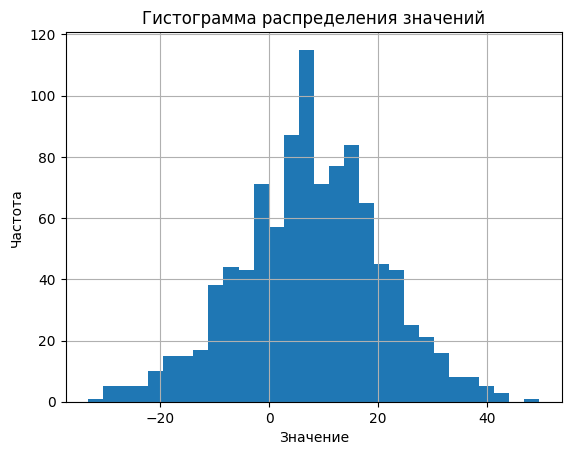

In [347]:
df['Znachenie'].hist(bins = 30)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений')

Предполагаем, что распределение нормальное, так как видно распределение с пиком в центре и симметричными боковыми сторонами


### Задание 3


In [348]:
tfirst = scipy.stats.t.ppf(q = 0.05/2, df = 999)
tsecond = scipy.stats.t.ppf(q = 1 - 0.05/2, df = 999)
print('tn-1,1-alpha/2 =', tsecond,'\ntn-1,alpha/2 =', tfirst)

tn-1,1-alpha/2 = 1.9623414611334487 
tn-1,alpha/2 = -1.962341461133449


In [349]:
n = 1000
a = meanZn - tsecond * math.sqrt(varNeSmeshRate2) / math.sqrt(n)
b = meanZn - tfirst * math.sqrt(varNeSmeshRate2) / math.sqrt(n)

In [350]:
print(f'P({a} <= μ <= {b}) = 0.95')

P(6.779272173212221 <= μ <= 8.400928030877267) = 0.95


### Задание 4


scv =  scipy.stats.chi2.ppf(firstProb, df = 999)
fcv = scipy.stats.chi2.ppf(secondProb , df = 999)
fcv,scv

In [353]:
c = varNeSmeshRate2 * (n - 1) / fcv
d = varNeSmeshRate2 * (n - 1) / scv
c,d

(156.69330967633252, 186.74964934774277)

In [354]:
print(f'P({a} <= σ^2 <= {b}) = 0.95')

P(156.69330967633252 <= σ^2 <= 186.74964934774277) = 0.95


### Задание 5


Уровень значимости 10%

Двусторнняя альтернатива
Получается берем z5 и z95

Cформулируем гипотезы

$ H0: μ0 = 0 $

$ H1: μ0 != 0 $

Так как мы предположили, что выборка получена из нормальной генеральной совокупности 𝑁(μ,σ2), но у нас неизвестна дисперсия, приведем распределение к Стьюденту

Тогда 

$ ((mean(x) - μ) / (varNeSmeshRate / sqrt(n))   (это)   tn-1 $

Найдем критическое значение функции

In [355]:
critical_value = (df.Znachenie.mean() - 0) / (math.sqrt(varNeSmeshRate2) / math.sqrt(n))
critical_value

18.369332869233308

In [356]:
z5 = scipy.stats.t.ppf(q = 0.05, df = 999)
z95 = scipy.stats.t.ppf(q = 0.95, df = 999)

In [357]:
print(f'Критическое значение {critical_value} выходит за пределы интервала {z5,z95}')

Критическое значение 18.369332869233308 выходит за пределы интервала (-1.6463803454275356, 1.646380345427535)


H0 отвергается в пользу H1

### Задание 6


Разделим выборку на 2 части по 500 значений


In [358]:
firstdf = df[0:500]
firstdf.tail()
seconddf = df[500:]
seconddf.tail()


,Nomer,Znachenie,diffBetweenMeanKv
995,996,-0.62,67.39
996,997,9.66,4.29
997,998,28.75,447.94
998,999,-27.58,1236.99
999,1000,20.33,162.35


<AxesSubplot: >

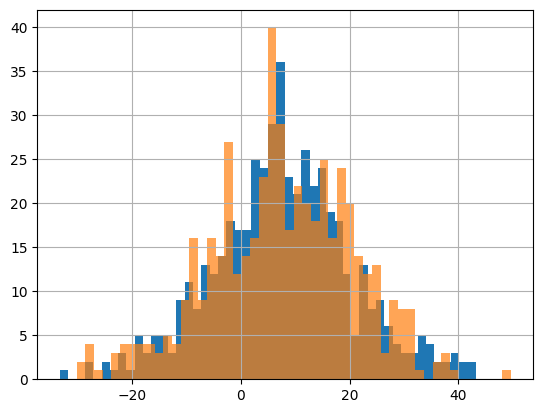

In [359]:
firstdf['Znachenie'].hist(bins = 50)
seconddf['Znachenie'].hist(bins = 50, alpha = 0.7)

In [360]:
#Mean
meanZn1 = firstdf.Znachenie.mean()
meanZn2 = seconddf.Znachenie.mean()
meanZn1, meanZn2

(7.672579869842593, 7.507620334246894)

In [361]:
# Несмещенная дисперсия
m = 500
var1NeSmeshRate2 = (firstdf['diffBetweenMeanKv'].sum()) / (m - 1)
var2NeSmeshRate2 = (seconddf['diffBetweenMeanKv'].sum()) / (m - 1)
var1NeSmeshRate2,var2NeSmeshRate2

(166.0071180387518, 175.79376609323836)

Мы хотим проверить гипотезу о равенстве мат. ожиданий.
Объединим две выборки в D = X - Y
Тогда E(D) = μ1 - μ2 = 0

Формула тестовой статистики будет приведена к t(n+m-2)
Уровень значимости 10%

Двусторнняя альтернатива
Получается берем z5 и z95

Cформулируем гипотезы

$ H0: μ1 = μ2 $

$ H1: μ1 != μ2 $


In [362]:
ze5 = scipy.stats.t.ppf(q = 0.05, df = 500 + 500 - 2)
ze95 = scipy.stats.t.ppf(q = 0.95, df = 500 + 500 - 2)
ze5,ze95

(-1.6463818766348761, 1.6463818766348755)

Применим формулу тестовой статистики для тестировании гипотезы о равенстве матожиданий

In [363]:
T = (meanZn1 - meanZn2) / (math.sqrt((1 / 500 + 1 / 500) * ((500 - 1))/(500 + 500 - 2) * var1NeSmeshRate2 + (500 - 1))/(500 + 500 - 2) * var2NeSmeshRate2)
T

0.04190924051968376

In [364]:
print(f'Критическое значение {T} не выходит за пределы интервала {ze5,ze95}')

Критическое значение 0.04190924051968376 не выходит за пределы интервала (-1.6463818766348761, 1.6463818766348755)


Тогда мы не отвергаем нулевую гипотезу

### Задание 7

Мы хотим проверить гипотезу о равенстве дисперсий.
Объединим две выборки в D = X - Y

Формула тестовой статистики будет приведена к F(n - 1, m - 1)

Гипотеза:

$ H0: σ1^2 = σ2^2 $

$ H1: σ1^2 != σ2^2 $

Уровень значимости 10%

Двусторнняя альтернатива

Получается берем F499,499,0.05 и F500,500,0.95



In [365]:
Ffirst = scipy.stats.f.ppf(0.05, 499, 499)
Fsecond = scipy.stats.f.ppf(0.95, 500, 500)
Ffirst, Fsecond

(0.8629418796107595, 1.1586553765546113)

Применим формулу тестовой статистики для тестировании гипотезы о равенстве дисперсий

In [366]:
Tvalue = ((1 / (500 - 1)) * (firstdf['diffBetweenMeanKv'].sum())) / ((1 / (500 - 1)) * (seconddf['diffBetweenMeanKv'].sum()))
Tvalue
print(f'Критическое значение {Tvalue} не выходит за пределы интервала {Ffirst, Fsecond}')

Критическое значение 0.944328810560348 не выходит за пределы интервала (0.8629418796107595, 1.1586553765546113)


Тогда мы не отвергаем гипотезу о равенстве дисперсий

### Задание 8

In [367]:
mean1 = df_first['metrics'].mean()
mean2= df_second['metrics'].mean()
df_first.loc[ df.metrics <= mean1, 'metrics'] = 0
df_first.loc[ df.metrics > mean1, 'metrics'] = 1
df_second.loc[ df.metrics <= mean2, 'metrics'] = 0
df_second.loc[ df.metrics > mean2, 'metrics'] = 1

Расчитаем параметры px

In [368]:
firstp0 = firstdf[firstdf['binary'] == 0].binary.count() / 500 
secondp0 = seconddf[seconddf['binary'] == 0].binary.count() / 500
firstp0, secondp0

(0.506, 0.508)

Тестовую статистику приведем к нормальному распределению 

Уровень значимости 10%

Двусторнняя альтернатива

Тогда найдем z5 и z95
Равенство единиц означает равенство матожиданий в распределении Бернулли



Гипотеза:

$ H0: px = py $

$ H1: px != py $
    

In [369]:
Tst = (firstp0 - secondp0) / math.sqrt(((firstp0 * (1 - firstp0)) / 500) + ((secondp0 * (1 - secondp0)) / 500))
Tst

-0.06325187870752942

In [370]:
z5norm = scipy.stats.norm.ppf(q = 0.05)
z95norm = scipy.stats.norm.ppf(q = 0.95)
z5norm,z95norm

(-1.6448536269514729, 1.6448536269514722)

In [371]:
print(f'Критическое значение {Tst} не выходит за пределы интервала {z5norm, z95norm}')

Критическое значение -0.06325187870752942 не выходит за пределы интервала (-1.6448536269514729, 1.6448536269514722)


Не отвергаем гипотезу о равенстве долей единиц